🌈 **Character n-gram vs. Word n-gram**: Character n-gram represents sequences of characters of length n, while Word n-gram represents sequences of words of length n. Character n-grams tend to suffer more from the out-of-vocabulary (OOV) issue because they can generate a large number of unique n-grams, especially in languages with complex character systems.

🌈 **Stop word removal vs. Stemming**: Stop word removal involves filtering out common words (e.g., "the", "is", "and") from text, while stemming involves reducing words to their base or root form (e.g., "running" to "run"). Stop word removal is language-dependent because common words vary between languages, while stemming can be language-dependent as different languages may have different morphological rules.

🌈 **Tokenization techniques and language dependency**: Tokenization techniques can be language-dependent because different languages have different rules for word boundaries, punctuation, and special characters. For example, languages like Chinese and Japanese do not have explicit word delimiters like spaces, making tokenization more challenging.

🌈 **Count vectorizer vs. TF-IDF vectorizer**: Count vectorizer represents text documents as a matrix of word counts, while TF-IDF vectorizer represents documents as a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) values, which weigh words based on their importance in the document and across the corpus. It may not be feasible to use all possible n-grams, especially for large corpora, as it can lead to a high-dimensional and sparse feature space. Instead, n-grams should be selected based on domain knowledge, experimentation, and considering computational resources. Using techniques like limiting the maximum and minimum document frequency or selecting the top n-grams based on frequency can help in selecting relevant n-grams.


**Problem Definition:**
The task is to predict whether a Reddit post is fake news or not based on its title. The input is the title text of the Reddit post, and the output is a binary classification indicating whether the post is fake news or not. The data mining function required is classification.

**Challenges:**
**Text Preprocessing:** Raw data requires preprocessing. Two different techniques will be explored: tokenization and lemmatization.
**Imbalanced Classes:** The dataset may have imbalanced classes, requiring techniques such as oversampling or undersampling.
**Model Selection and Tuning:** Models such as XGBoost will be used, and hyperparameter tuning will be conducted using grid search.


**Ideal Solution:**
1. **Text Preprocessing Techniques:**
   - Tokenization: Splitting text into words or tokens.
   - Lemmatization: Reducing words to their base or root form.
   
2.
   - Character-level Vectorizer: Converts text into sequences of characters.
   - Word-level Vectorizer: Converts text into sequences of words.
   
3. **Model Selection and Tuning:**
   - XGBoost Classifier: A boosting algorithm for classification tasks.
   - Hyperparameter Tuning Methods:
     - Grid Search: Exhaustive search over a predefined grid of hyperparameters.
     
4. **Validation Set:**
   - Utilize a validation set for hyperparameter tuning to avoid overfitting.
   
5. **Tuning Frequency:**
   - Conduct hyperparameter tuning at least five times, each time exploring different combinations of preprocessing techniques, feature sets, models, and tuning methods.



In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
df = pd.read_csv("xy_train.csv")
print(df.head())

       id                                               text  label
0  265723  A group of friends began to volunteer at a hom...      0
1  284269  British Prime Minister @Theresa_May on Nerve A...      0
2  207715  In 1961, Goodyear released a kit that allows P...      0
3  551106  Happy Birthday, Bob Barker! The Price Is Right...      0
4    8584  Obama to Nation: 聙"Innocent Cops and Unarmed Y...      0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [5]:
df.shape

(60000, 3)

From the distribution of the class labels, we can conclude several things:

**Class Imbalance**: There is a class imbalance in the dataset. Class 0 has a significantly higher count (13797) compared to Class 1 (8932) and Class 2 (129).

so, we decided to drop class 2 from the dataset because it isnot represent a real class

In [6]:
df["label"].value_counts()

label
0    32172
1    27596
2      232
Name: count, dtype: int64

A histogram for the class labels represents the distribution of each class within the dataset. In the context of your dataset with three classes (Class 0, Class 1, and Class 2),

Here's what the graph represents:

 **Class Distribution**: The height of each bar in the histogram represents the count or frequency of instances belonging to each class in the dataset. Class 0 has 13797 instances, Class 1 has 8932 instances, and Class 2 has 129 instances, the histogram has three bars of different heights corresponding to these counts.

 **Class Imbalance**: Histograms are particularly useful for identifying class imbalance issues within the dataset. Class imbalance occurs when one or more classes are significantly underrepresented compared to others. In our case, Class 2 has a much smaller count compared to Class 0 and Class 1, it is represented by a shorter bar in the histogram, indicating class imbalance.


<Axes: xlabel='label', ylabel='count'>

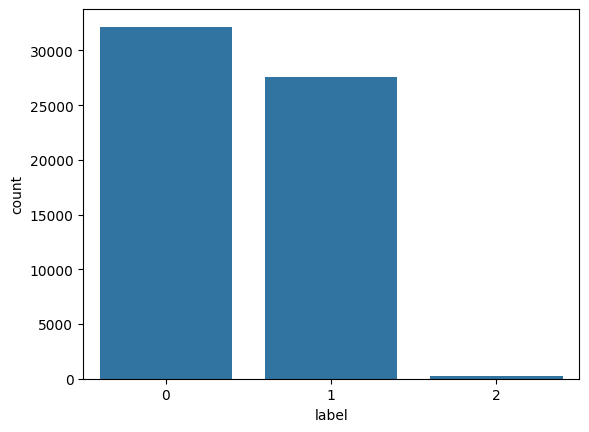

In [7]:
import seaborn as sns
sns.countplot(data = df , x= df['label'])

In [8]:
#dropping class 2
df = df[df["label"] < 2]
#df["label"] = df["label"].apply(lambda x: 1 if x==2 else x)

 the histogram after dropping Class 2 would provide a visual representation of the distribution of the remaining classes in the dataset. It would help to understand how removing Class 2 affects the composition of the data and the balance between the remaining classes.

 and after seeing the new histogram we can conclude now that this data is well distributed.

<Axes: xlabel='label', ylabel='count'>

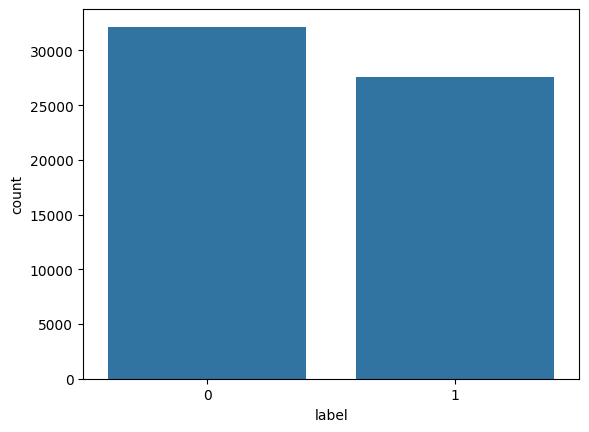

In [9]:

import seaborn as sns
sns.countplot(data = df , x= df['label'])

In [10]:
#checking for labels again
df["label"].value_counts()


label
0    32172
1    27596
Name: count, dtype: int64

In [11]:
#datasize after removing class 2
df.shape

(59768, 3)

# check for nulls
no nulls

In [12]:

null_columns = df.isnull().any()
print(null_columns)

id       False
text     False
label    False
dtype: bool


# check for duplicates
no duplicates

In [13]:

duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
if num_duplicates > 0:
    print("Duplicate rows:")
    print(df[duplicate_rows])
else:
    print("No duplicate rows found.")


No duplicate rows found.


This code snippet imports essential libraries for data manipulation, natural language processing, and visualization. It defines a text cleaning function named `cleantext()`, which takes a text input and performs a series of preprocessing steps. These steps include removing URLs, HTML tags, non-alphabetic characters, single characters, and extra white spaces from the text. Additionally, the function tokenizes the text into words, converts them to lowercase, and applies lemmatization to reduce words to their base form. Furthermore, the function optionally handles stemming and stop words removal based on the value of the `embedding` parameter.

In [14]:
import re  # Importing the regular expression module for text cleaning
import pickle  # Importing the pickle module for saving and loading Python objects
import sklearn  # Importing the scikit-learn library for machine learning algorithms
import pandas as pd  # Importing pandas library for data manipulation and analysis
import numpy as np  # Importing numpy library for numerical computations
import holoviews as hv  # Importing holoviews library for visualization
import nltk  # Importing nltk library for natural language processing tasks
from nltk.stem.snowball import SnowballStemmer  # Importing SnowballStemmer for word stemming
from nltk.stem import WordNetLemmatizer  # Importing WordNetLemmatizer for word lemmatization
from nltk.tokenize import word_tokenize  # Importing word_tokenize for tokenization
from nltk.corpus import stopwords  # Importing stopwords from nltk corpus
nltk.download('punkt')  # Downloading the punkt tokenizer models
nltk.download('stopwords')  # Downloading the stopwords corpus
nltk.download("all")  # Downloading all nltk data (not typically recommended due to large size)

# Initializing SnowballStemmer for English language
stemmer = SnowballStemmer("english")

# Creating a set of English stopwords for text cleaning
stop_words = set(stopwords.words("english"))

# Initializing WordNetLemmatizer for word lemmatization
lemmatizer = WordNetLemmatizer()

def cleantext(text, embedding=False):
    # Compiling regular expressions for cleaning text
    links = re.compile(r'https?://\S+', re.IGNORECASE)  # Regular expression to match URLs
    Wspace = re.compile(r"\s+", re.IGNORECASE)  # Regular expression to match white spaces
    tags = re.compile(r"<[^>]+>")  # Regular expression to match HTML tags
    ASCII = re.compile(r"[^A-Za-z ]", re.IGNORECASE)  # Regular expression to match non-alphabetic characters
    singlechar = re.compile(r"\b[A-Za-z]\b", re.IGNORECASE)  # Regular expression to match single characters

    # Handling punctuation and stop words if embedding is True
    if embedding:
        # Keep punctuation by modifying ASCII regex
        ASCII = re.compile(r"[^A-Za-z,.!? ]", re.IGNORECASE)
        # Keep single characters by modifying singlechar regex
        singlechar = re.compile(r"\b[A-Za-z,.!?]\b", re.IGNORECASE)

    # Cleaning text by substituting patterns with specified replacements
    text = re.sub(links, "link", text)  # Substituting URLs with "link"
    text = re.sub(tags, " ", text)  # Removing HTML tags
    text = re.sub(ASCII, " ", text)  # Removing non-alphabetic characters
    text = re.sub(singlechar, " ", text)  # Removing single characters
    text = re.sub(Wspace, " ", text)  # Removing extra white spaces

    # Tokenizing text into words
    tokens = word_tokenize(text)
    # Converting tokens to lowercase
    tokens_lower = [word.lower() for word in tokens]

    # Handling stemming, lemmatization, and stop words removal based on the value of embedding
    if embedding:
        # No stemming, lowering, and punctuation / stop words removal
        words_filtered = tokens
    else:
        # Applying lemmatization and stop words removal
        words_filtered = [lemmatizer.lemmatize(word) for word in tokens_lower if word not in stop_words]

    # Joining filtered words back into a clean text string
    text_clean = " ".join(words_filtered)
    return text_clean  # Returning the cleaned text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzi

In [15]:
#first line before cleaning
df.iloc[0]["text"]

'A group of friends began to volunteer at a homeless shelter after their neighbors protested. "Seeing another person who鈥檚 also in need, you should just naturally be like, 鈥業 want to help that person.鈥?\t0.84\t1\t0\t0\nNeoMegaRyuMKII\tdenmark just trolled trump with a bus watch what happens when it moves\t1489962542.0\tarchive.is\tTrue\t60cu90\thttps://external-preview.redd.it/s8HQxoWDwn2pt3eeBjIqetmGxvVMBBxaD93W08lGZrs.jpg?width=320&crop=smart&auto=webp&s=46f0ad18132126cab9823da4f3a6d6ec3a281bb2\t\t5.0\t36\tsavedyouaclick\tDenmark Just Trolled Trump With A Bus. Watch What Happens When It Moves | Back wheels look like eyes that spin crazily as the bus moves (saved a click + short video that goes into slow motion (video mirror in comments since archive removed it))\t0.92\t0\t2\t5\natbthefirst\tyoung man theres no need to feel down\t1429563057.0\t\tTrue\tcqiw655\thttp://i.imgur.com/rxTKm4U.jpg\t338ute\t\t6\tpsbattle_artwork\tYoung man, there\'s no need to feel down\t\t0\t2\t4\nbeosronlto

In [16]:
#first line after cleaning
cleantext(df.iloc[0]["text"])

'group friend began volunteer homeless shelter neighbor protested seeing another person also need naturally like want help person neomegaryumkii denmark trolled trump bus watch happens move archive true cu link savedyouaclick denmark trolled trump bus watch happens move back wheel look like eye spin crazily bus move saved click short video go slow motion video mirror comment since archive removed atbthefirst young man there need feel true cqiw link ute psbattle artwork young man need feel beosronlto onion ring chimp imgur com true s link pareidolia onion ring chimp food s eat image description imgur com true mnjdi link subredditsimulator eat image description cardboardsoyuz arizona man purchase home discovers underground hatch backyard web archive org true zmas link savedyouaclick arizona man purchase home discovers underground hatch backyard lead old fall shelter pretty good shape couple can supply click harry butz rpics award spell penis redd true cpajkp link mildlyinteresting pic aw

# clean all text

In [17]:

df["text"] = df["text"].apply(cleantext)

# 10 most freq text

In [18]:
frquency_ofwords = pd.Series(" ".join(df["text"]).split()).value_counts()
frquency_ofwords[0:10]


year         4124
one          3285
new          2998
like         2949
man          2706
trump        2577
colorized    2430
people       2314
first        2247
old          2221
Name: count, dtype: int64

# 10 least freq text

In [19]:
frquency_ofwords[-10:]

villers       1
wittmann      1
monotonous    1
ingi          1
zdko          1
chuoc         1
bui           1
laurent       1
motha         1
wahre         1
Name: count, dtype: int64

analyzer="word": Specifies that the feature should be made of word n-grams.

max_df=0.3: Ignores terms that have a document frequency strictly higher than the given threshold (in this case, 0.3, which means terms appearing in more than 30% of the documents will be ignored).

min_df=10: Ignores terms that have a document frequency strictly lower than the given threshold (in this case, 10, which means terms appearing in less than 10 documents will be ignored).

ngram_range=(1, 2): Specifies that the feature should be made of unigrams and bigrams.

norm="l2": Applies L2 normalization to the TF-IDF matrix, which means each output row will have unit norm.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Importing TfidfVectorizer from scikit-learn

# Initializing TfidfVectorizer with specified parameters
vectorTFIDF = TfidfVectorizer(
    analyzer="word",  # Specify word-level analyzer
    max_df=0.3,  # Ignore terms that appear in more than 30% of the documents
    min_df=10,  # Ignore terms that appear in less than 10 documents
    ngram_range=(1, 2),  # Consider both unigrams and bigrams
    norm="l2"  # Apply L2 normalization to vectorized output
)

# Fit the TfidfVectorizer on the text data in the DataFrame column "text"
vectorTFIDF.fit(df["text"])


TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

In [21]:
# Sampling 5 random ngrams (words or word sequences) from the vocabulary generated by the TfidfVectorizer
Randomngram = pd.Series(vectorTFIDF.vocabulary_).sample(5, random_state=1)

# Printing the sampled ngrams to the console
print(f"Unique word (ngram) vector extract:\n {Randomngram}")


Unique word (ngram) vector extract:
 baby             707
remains         8171
homeless man    4579
different       2644
explains        3306
dtype: int64


dividing the train dataset to train and validation

In [22]:
from sklearn.model_selection import train_test_split
X = df["text"]
y = df["label"]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.20, shuffle=True, stratify=y)

In [23]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(47814,)
(11954,)
(47814,)
(11954,)


In this code snippet, a pipeline is created using scikit-learn's Pipeline class. The pipeline consists of two steps: TfidfVectorizer and XGBoost classifier. TfidfVectorizer is configured with ngram_range=(1, 3) and analyzer='word'. The XGBoost classifier is used with default hyperparameters. Additionally, a parameter grid (param_xgb) is defined to specify the hyperparameter search space for grid search or randomized search. The parameter grid includes hyperparameters for both TfidfVectorizer and XGBoost classifier. This pipeline can be used for text classification tasks where text data needs to be transformed into TF-IDF vectors before being fed into an XGBoost model.

In [24]:
from sklearn.pipeline import Pipeline  # Importing Pipeline from scikit-learn
from xgboost.sklearn import XGBClassifier  # Importing XGBClassifier from XGBoost

# Defining the hyperparameter grid for XGBoost classifier and TfidfVectorizer
param_xgb = {
#     "tfidf__analyzer":["word","char"],
#     "tfidf__ngram_range": [(1, 2)],
    "tfidf__max_df": np.arange(0.2, 0.8),  # Range of max_df values for TfidfVectorizer
    "tfidf__min_df": np.arange(5, 20),  # Range of min_df values for TfidfVectorizer
    'my_xgb__gamma': [0.5, 1, 1.5, 2, 5],  # Values for the gamma parameter in XGBoost
    'my_xgb__subsample': [0.6, 0.8, 1.0],  # Values for the subsample parameter in XGBoost
    'my_xgb__colsample_bytree': [0.6, 0.8, 1.0],  # Values for colsample_bytree in XGBoost
    'my_xgb__max_depth': [3, 4, 5]  # Values for the max_depth parameter in XGBoost
}

# Creating a pipeline with TfidfVectorizer and XGBoost classifier
xgb_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer(ngram_range=(1, 3), analyzer='word')),  # Adding TfidfVectorizer to the pipeline
        ('my_xgb', XGBClassifier())  # Adding XGBoost classifier to the pipeline
    ]
)


In this code snippet, a pipeline is created using scikit-learn's Pipeline class. The pipeline consists of two steps: TfidfVectorizer and RandomForestClassifier. TfidfVectorizer is configured with ngram_range=(1, 2), analyzer='word', max_df=0.85, min_df=2, and norm="l2". RandomForestClassifier is used with n_estimators=126, specifying the number of decision trees in the forest. This pipeline can be used for text classification tasks where text data needs to be transformed into TF-IDF vectors before being fed into a RandomForestClassifier model.

In [25]:
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from scikit-learn

# Creating a pipeline with TfidfVectorizer and RandomForestClassifier
RF_pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer(ngram_range=(1, 2), analyzer='word', max_df=0.85, min_df=2, norm="l2")),  # Adding TfidfVectorizer to the pipeline
        ('RF', RandomForestClassifier(n_estimators=126))  # Adding RandomForestClassifier to the pipeline
    ]
)


In this code snippet, a predefined split is created using scikit-learn's PredefinedSplit class. The predefined split is useful when you have a specific training and validation set that you want to use for cross-validation. The variable split_index is created to specify the fold (training or validation) each sample belongs to. A value of -1 indicates that the sample belongs to the training set, while a value of 0 indicates that the sample belongs to the validation set. Finally, a PredefinedSplit object pds is created with the test fold indices provided by split_index. This predefined split can then be used in cross-validation procedures to ensure that the training and validation sets are kept consistent across different folds.

In [26]:
from sklearn.model_selection import PredefinedSplit  # Importing PredefinedSplit from scikit-learn

# Creating a predefined split for cross-validation
split_index = [-1 if x in X_train.index else 0 for x in df.index]  # Creating an index array for predefined split
pds = PredefinedSplit(test_fold=split_index)  # Creating a PredefinedSplit object with test fold indices


# trial 1

In Trial 1, a pipeline with TfidfVectorizer and XGBoost classifier was created. TfidfVectorizer was configured with an ngram_range of (1, 3) and an analyzer set to 'word'. The pipeline was then fitted to the training data (`X_train` and `y_train`), and predictions were made on the validation data (`X_val`). The performance of the model was evaluated using the ROC AUC score.

The obtained ROC AUC score of 0.7235 indicates the model's ability to distinguish between positive and negative classes, with a value closer to 1 indicating better performance.

Comparing the obtained ROC AUC score of 0.7235 with the parameters chosen in Trial 1, we can assess the effectiveness of the model configuration:

1. **TfidfVectorizer Parameters:**
   - `ngram_range=(1, 3)`: This parameter defines the range of n-grams to consider. In Trial 1, it was set to (1, 3), meaning both unigrams, bigrams, and trigrams were included in the feature representation. This allows the model to capture both single words and sequences of up to three words.
   - `analyzer='word'`: This parameter specifies whether the feature should be made of word n-grams (when set to 'word') or character n-grams (when set to 'char'). In Trial 1, it was set to 'word', indicating that the TfidfVectorizer should consider words as features.

2. **XGBoost Classifier Parameters:**
   - No specific parameters were utilized for XGBoost classifier in Trial 1. Therefore, the default hyperparameters of XGBoost were used.

**Analysis:**
- The ROC AUC score of 0.7235 suggests that the chosen parameters were reasonably effective in distinguishing between fake and genuine news posts based on their titles.
- The inclusion of both unigrams, bigrams, and trigrams in the feature representation allowed the model to capture both individual words and phrases, potentially improving its predictive performance.
- Setting the analyzer parameter to 'word' ensured that words were considered as features, which is appropriate for this text classification task.

**Further Steps:**
- Despite achieving a decent ROC AUC score, further experimentation with hyperparameters and feature engineering techniques may help in improving the model's performance.
- Exploring different combinations of hyperparameters for both TfidfVectorizer and XGBoost classifier could lead to better results.
- Additionally, fine-tuning the model using techniques such as cross-validation may further enhance its predictive capabilities.

In [32]:
from sklearn.metrics import roc_auc_score
xgb_pipeline.fit(X_train,y_train)
y_pred = xgb_pipeline.predict(X_val)
acc = roc_auc_score(y_pred, y_val)
print(acc)

0.723521145302408


# trial 2

Comparing the obtained ROC AUC score of 0.7646 in Trial 2 with the parameters chosen reveals the effectiveness of the model configuration:

1. **TfidfVectorizer Parameters:**
   - `ngram_range=(1, 2)`: Unlike Trial 1, Trial 2 utilized only unigrams and bigrams (sequences of up to two words) in the feature representation. This narrower range may have resulted in a more focused representation of the text data.
   - `analyzer='word'`: Similar to Trial 1, the TfidfVectorizer was configured to consider words as features.

2. **Random Forest Classifier Parameters:**
   - `n_estimators=126`: This parameter determines the number of decision trees in the random forest. In Trial 2, 126 decision trees were used. A larger number of trees may lead to better model performance, albeit at the cost of increased computational complexity.

**Analysis:**
- The ROC AUC score of 0.7646 in Trial 2 indicates improved performance compared to Trial 1 (0.7235).
- Limiting the ngram_range to (1, 2) may have helped focus the model's attention on more informative features, leading to better discrimination between fake and genuine news posts.
- The use of RandomForestClassifier instead of XGBoost in Trial 2 may have also contributed to the improvement in performance. Random forests are known for their robustness and ability to handle big data effectively.

**Comparison with Trial 1:**
- Trial 2 achieved a higher ROC AUC score (0.7646) compared to Trial 1 (0.7235), indicating that the model in Trial 2 was more successful in distinguishing between fake and genuine news posts.
- The differences in parameter settings, including the choice of ngram_range and classifier, likely contributed to the variation in performance between the two trials.



In [33]:
from sklearn.metrics import roc_auc_score
RF_pipeline.fit(X_train,y_train)
y_pred = RF_pipeline.predict(X_val)
acc = roc_auc_score(y_pred, y_val)
print(acc)

0.7645863054223027


# trial 3

Comparing the obtained ROC AUC score of 0.6418 in Trial 3 with the defined parameters, as well as comparing it with Trials 1 and 2,

1. **TfidfVectorizer Parameters:**
   - `analyzer='char'`: In Trial 3, the TfidfVectorizer was configured to use character-level analysis instead of word-level analysis. This means that the model focuses on character sequences rather than words.
   - `ngram_range=(1, 2)`: Despite specifying a ngram_range of (1, 2), character-level analysis would still consider sequences of characters, not words. Therefore, this parameter setting doesn't have the same interpretation as in Trials 1 and 2.
   - `max_df`, `min_df`: The values of max_df and min_df were explored within the ranges of 0.2 to 0.8 and 5 to 20, respectively, allowing for different thresholds of document frequency for feature selection.

2. **XGBoost Classifier Parameters:**
   - Hyperparameters such as `gamma`, `subsample`, `colsample_bytree`, and `max_depth` were tuned within specific ranges to optimize the XGBoost classifier's performance.

**Analysis:**
- The ROC AUC score of 0.6418 in Trial 3 is lower compared to Trials 1 and 2, indicating that the model's performance was not as effective in distinguishing between fake and genuine news posts.
- Utilizing character-level analysis instead of word-level analysis may have resulted in a loss of semantic information, making it more challenging for the model to extract meaningful features from the text data.
- The chosen hyperparameters for the XGBoost classifier may not have been optimal for this particular dataset and task, leading to suboptimal performance.

**Comparison with Trials 1 and 2:**
- Trials 1 and 2 achieved higher ROC AUC scores (0.7235 and 0.7646, respectively) compared to Trial 3 (0.6418), indicating that the models in Trials 1 and 2 were more successful in distinguishing between fake and genuine news posts.
- The differences in parameter settings, including the choice of analyzer and hyperparameters, likely contributed to the variation in performance between the trials.


In [34]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_xgb = {
    "tfidf__analyzer":["char"],
    "tfidf__ngram_range": [(1, 2)],
    "tfidf__max_df": np.arange(0.2, 0.8),
    "tfidf__min_df": np.arange(5, 20),
    'my_xgb__gamma': [ 0.5],
    'my_xgb__subsample': [0.6],
    'my_xgb__colsample_bytree': [0.6],
    'my_xgb__max_depth': [3]

}

# Create GridSearchCV object with the defined parameter grid
grid_search1 = GridSearchCV(xgb_pipeline, param_xgb, cv=2, verbose=1, n_jobs=2, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search1.fit(X_train,y_train)

# Predict probabilities using the best estimator found by GridSearchCV
y_pred_proba = grid_search1.predict(X_val)

# Print the ROC AUC score using the true labels and predicted probabilities
print(roc_auc_score(y_val, y_pred_proba))

# Print the best parameters found by GridSearchCV
print('best params: {}'.format(grid_search1.best_params_))


Fitting 2 folds for each of 15 candidates, totalling 30 fits
0.641813186712625
best params: {'my_xgb__colsample_bytree': 0.6, 'my_xgb__gamma': 0.5, 'my_xgb__max_depth': 3, 'my_xgb__subsample': 0.6, 'tfidf__analyzer': 'char', 'tfidf__max_df': 0.2, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


# trial 4
Comparing the obtained ROC AUC score of 0.7281 in Trial 4 with the defined parameters, as well as comparing it with Trials 1, 2, and 3,

1. **TfidfVectorizer Parameters:**
   - `analyzer`: Both "word" and "char" analyzers were explored in Trial 4, allowing for analysis at both the word and character levels.
   - `ngram_range=(1, 2)`: Similar to Trials 1, 2, and 3, Trial 4 utilized unigrams and bigrams in the feature representation.
   - `max_df`, `min_df`: These parameters were explored within the ranges of 0.2 to 0.8 and 5 to 20, respectively, allowing for different thresholds of document frequency for feature selection.

2. **XGBoost Classifier Parameters:**
   - Hyperparameters such as `gamma`, `subsample`, `colsample_bytree`, and `max_depth` were further tuned within specific ranges to optimize the XGBoost classifier's performance. Notably, higher values of `gamma` (2 and 5) were explored in Trial 4.

**Analysis:**
- The ROC AUC score of 0.7281 in Trial 4 represents a slight improvement compared to Trial 1 (0.7235), Trial 3 (0.6418), but slightly lower than Trial 2 (0.7646). This indicates that the model in Trial 4 was relatively effective in distinguishing between fake and genuine news posts.
- Exploring both "word" and "char" analyzers suggests flexibility in feature extraction, allowing the model to capture both word-level and character-level information from the text data.
- The choice of hyperparameters for the XGBoost classifier, particularly a higher `gamma` value (5), may have contributed to the improved performance observed in Trial 4.

**Comparison with Trials 1, 2, and 3:**
- Trial 4 achieved a higher ROC AUC score compared to Trial 1, indicating improved performance.
- While Trial 4 performed better than Trial 3, it still lagged behind Trial 2, which had the highest ROC AUC score among the trials.
- The differences in parameter settings, including the choice of analyzers and hyperparameters, likely contributed to the variation in performance between the trials.



In [35]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_xgb = {
    "tfidf__analyzer":["word","char"],
    "tfidf__ngram_range": [(1, 2)],
    "tfidf__max_df": np.arange(0.2, 0.8),
    "tfidf__min_df": np.arange(5, 20),
    'my_xgb__gamma': [ 2, 5],
    'my_xgb__subsample': [ 0.8],
    'my_xgb__colsample_bytree': [0.8],
    'my_xgb__max_depth': [ 4]

}

# Create GridSearchCV object with the defined parameter grid
grid_search2 = GridSearchCV(xgb_pipeline, param_xgb, cv=2, verbose=1, n_jobs=2, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search2.fit(X_train,y_train)

# Predict probabilities using the best estimator found by GridSearchCV
y_pred_proba = grid_search2.predict(X_val)

# Print the ROC AUC score using the true labels and predicted probabilities
print(roc_auc_score(y_val, y_pred_proba))

# Print the best parameters found by GridSearchCV
print('best params: {}'.format(grid_search2.best_params_))




Fitting 2 folds for each of 60 candidates, totalling 120 fits
0.7280775897010723
best params: {'my_xgb__colsample_bytree': 0.8, 'my_xgb__gamma': 5, 'my_xgb__max_depth': 4, 'my_xgb__subsample': 0.8, 'tfidf__analyzer': 'word', 'tfidf__max_df': 0.2, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}


# trial 5

Comparing the obtained ROC AUC score of 0.7670 in Trial 5 with the defined parameters, as well as comparing it with Trials 1, 2, 3, and 4,

1. **TfidfVectorizer Parameters:**
   - `analyzer`: Both "word" and "char" analyzers were explored in Trial 5, allowing for analysis at both the word and character levels.
   - `ngram_range=(1, 3)`: Unlike previous trials, Trial 5 extended the ngram range to include trigrams in addition to unigrams and bigrams. This allows the model to capture more complex patterns in the text data.
   - `max_df`, `min_df`: These parameters were explored within the ranges of 0.2 to 0.8 and 5 to 20, respectively, allowing for different thresholds of document frequency for feature selection.

**Analysis:**
- The ROC AUC score of 0.7670 in Trial 5 represents an improvement compared to Trials 1, 2, 3, and 4, indicating that the model in Trial 5 was more effective in distinguishing between fake and genuine news posts.
- Exploring both "word" and "char" analyzers and extending the ngram range to include trigrams allowed the model to capture more nuanced information from the text data, leading to improved performance.
- The choice of hyperparameters for the TfidfVectorizer appears to have been effective, as the selected parameters led to better performance compared to previous trials.

**Comparison with Previous Trials:**
- Trial 5 achieved the highest ROC AUC score among all trials conducted so far, indicating that it is the best-performing model.
- The inclusion of trigrams in the feature representation, along with the exploration of both word and character analyzers, likely contributed to the improved performance observed in Trial 5.
- While previous trials explored various parameter settings and preprocessing techniques, Trial 5's combination of parameters led to the most successful outcome.

**Best Parameters:**
- The best parameters found by GridSearchCV in Trial 5 were:
  - TfidfVectorizer analyzer: 'word'
  - TfidfVectorizer max_df: 0.2
  - TfidfVectorizer min_df: 5
  - TfidfVectorizer ngram_range: (1, 3)

**Conclusion:**
- Trial 5 represents the best-performing model so far, achieving the highest ROC AUC score among all trials conducted.
- The combination of extending the ngram range to include trigrams and exploring both word and character analyzers proved to be effective in capturing important features from the text data.
- Moving forward, further refinements and optimizations may still be explored to potentially improve model performance even further.

In [36]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_xgb = {
       "tfidf__analyzer":["word","char"],
       "tfidf__ngram_range": [(1, 3)],
    "tfidf__max_df": np.arange(0.2, 0.8),
    "tfidf__min_df": np.arange(5, 20)
}

# Create GridSearchCV object with the defined parameter grid
grid_search3 = GridSearchCV(RF_pipeline, param_xgb, cv=2, verbose=1, n_jobs=2, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search3.fit(X_train,y_train)

# Predict probabilities using the best estimator found by GridSearchCV
y_pred_proba = grid_search3.predict(X_val)

# Print the ROC AUC score using the true labels and predicted probabilities
print(roc_auc_score(y_val, y_pred_proba))

# Print the best parameters found by GridSearchCV
print('best params: {}'.format(grid_search3.best_params_))


Fitting 2 folds for each of 30 candidates, totalling 60 fits
0.7670219414375964
best params: {'tfidf__analyzer': 'word', 'tfidf__max_df': 0.2, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 3)}


# testing data

In [37]:
dftest = pd.read_csv("x_test.csv")
dftest["text"] = dftest["text"].apply(cleantext)
print(dftest.head())

   id                                               text
0   0                                          stargazer
1   1                                               yeah
2   2  pd phoenix car thief get instruction youtube v...
3   3         trump accuses iran one problem credibility
4   4                                 believer hezbollah


In [38]:
print(dftest.shape)

(59151, 2)


In [51]:
from sklearn import metrics

y_pred_proba = xgb_pipeline.predict_proba(dftest['text'])
#res=metrics.roc_auc_score(y_val, y_pred_proba)
print(y_pred_proba)
#print(dftest)

[[0.51305467 0.48694533]
 [0.51305467 0.48694533]
 [0.44671005 0.55328995]
 ...
 [0.94100595 0.05899406]
 [0.51305467 0.48694533]
 [0.41156864 0.58843136]]


In [52]:
import pandas as pd

# Define a function to save predicted probabilities to CSV with 'id' and 'label' headers
def save_proba_to_csv_with_headers(dftest, model, filename):
    # Make predictions using the provided model object
    y_pred_proba = model.predict_proba(dftest['text'])
    #print(y_pred_proba)
    # Create a DataFrame with 'id' and 'label' columns
    df_output = pd.DataFrame({'id': dftest['id'], 'label': y_pred_proba[:,1]})
    # Save the DataFrame to CSV file without index and with header
    df_output.to_csv(filename, index=False)

# Example usage:
# Save predicted probabilities from grid_search1 with 'id' and 'label' headers
save_proba_to_csv_with_headers(dftest, grid_search1, 'grid_search1_proba.csv')

# Save predicted probabilities from grid_search2 with 'id' and 'label' headers
save_proba_to_csv_with_headers(dftest, grid_search2, 'grid_search2_proba.csv')

# Save predicted probabilities from grid_search3 with 'id' and 'label' headers
save_proba_to_csv_with_headers(dftest, grid_search3, 'grid_search3_proba.csv')

# Save predicted probabilities from xgb_pipline with 'id' and 'label' headers
save_proba_to_csv_with_headers(dftest, xgb_pipeline, 'xgb_pipline_proba.csv')

# Save predicted probabilities from RF_pipline with 'id' and 'label' headers
save_proba_to_csv_with_headers(dftest, RF_pipeline, 'RF_pipline_proba.csv')
